# Анализ бизнес-показателей

## Изучение данных и подготовка их к анализу

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import plotly.express as px
import seaborn as sns

In [2]:
visits # информация о визитах
orders # информация о заказах
costs # информация о расходах

In [3]:
def preprocessing(df):
    print ('---------------------------- Первые пять строк ---------------------------')
    display(df.head())
    print ('')
    print ('')
    print ('---------------------------- Тип данных ---------------------------') 
    print (df.info())
    print ('')
    print ('')
    print ('---------------------------- Пропуски ---------------------------')   
    count = 0
    for element in df.columns:
        if df[element].isna().sum() > 0:
            print(element, ' - ', df[element].isna().sum(), 'пропусков')
            count =+1
    if count == 0:
            print('Пропусков нет')
    print ('')
    print ('')            
    print ('---------------------------- Дубликаты ---------------------------')           
    if df.duplicated().sum() > 0:
        print('Дубликатов: ', df.duplicated().sum())
    else:
        print('Дубликатов нет')

In [4]:
preprocessing(visits)

---------------------------- Первые пять строк ---------------------------


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168




---------------------------- Тип данных ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


---------------------------- Пропуски ---------------------------
Пропусков нет


---------------------------- Дубликаты ---------------------------
Дубликатов нет


In [5]:
preprocessing(orders)

---------------------------- Первые пять строк ---------------------------


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450




---------------------------- Тип данных ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


---------------------------- Пропуски ---------------------------
Пропусков нет


---------------------------- Дубликаты ---------------------------
Дубликатов нет


In [6]:
preprocessing(costs)

---------------------------- Первые пять строк ---------------------------


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08




---------------------------- Тип данных ---------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


---------------------------- Пропуски ---------------------------
Пропусков нет


---------------------------- Дубликаты ---------------------------
Дубликатов нет


In [7]:
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(" ", "_")
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(" ", "_")

In [8]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [9]:
visits_new = visits.copy()
orders_new = orders.copy()
costs_new = costs.copy()

# для анализа ROMI по когортам в разрезе источников

## Рассчет метрик и построение графиков

### Продуктовые метрики

#### DAU, WAU и MAU

In [10]:
visits['start_year'] = visits['start_ts'].dt.year
visits['start_month'] = visits['start_ts'].dt.month
visits['start_week'] = visits['start_ts'].dt.week
visits['start_date'] = pd.to_datetime(visits['start_ts'].dt.date)

/tmp/ipykernel_139/169593632.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  visits['start_week'] = visits['start_ts'].dt.week


In [11]:
visits['start_year']  = visits['start_ts'].astype('datetime64[Y]')
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')
visits['start_week'] = visits['start_ts'].astype('datetime64[W]')
visits['start_date']  = visits['start_ts'].dt.date

In [12]:
dau= visits.groupby('start_date').agg({'uid': 'nunique'})
wau= visits.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'})
mau= visits.groupby(['start_year', 'start_month']).agg({'uid': 'nunique'})

In [13]:
print('Среднее кол-во уникальных пользователей в день - ', int(dau.mean()))
print('Среднее кол-во уникальных пользователей в неделю - ', int(wau.mean())) 
print('Среднее кол-во уникальных пользователей в месяц - ', int(mau.mean()))

Среднее кол-во уникальных пользователей в день -  907
Среднее кол-во уникальных пользователей в неделю -  5621
Среднее кол-во уникальных пользователей в месяц -  23228


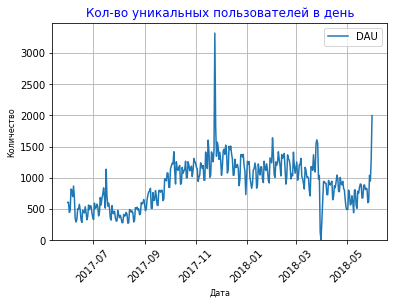

In [14]:
visits.groupby('start_date').agg({'uid': 'nunique'}).plot(ylim=0, rot=45, grid=True)
plt.grid()
plt.title('Кол-во уникальных пользователей в день', fontsize=12, color='blue')
plt.xlabel('Дата', fontsize=8)
plt.ylabel('Количество', fontsize=8)
plt.legend(labels= ['DAU'])
plt.grid()
plt.show()

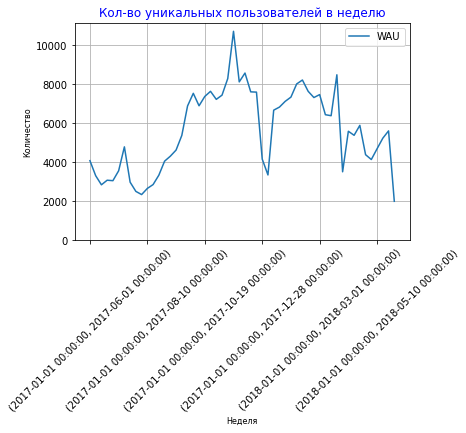

In [15]:
visits.groupby(['start_year', 'start_week']).agg({'uid': 'nunique'}).plot(ylim=0, rot=45, grid=True)
plt.grid()
plt.title('Кол-во уникальных пользователей в неделю', fontsize=12, color='blue')
plt.xlabel('Неделя', fontsize=8)
plt.ylabel('Количество', fontsize=8)
plt.legend(labels= ['WAU'])
plt.grid()
plt.show()

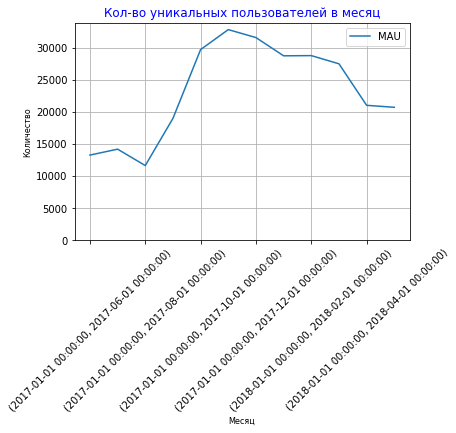

In [16]:
visits.groupby(['start_year', 'start_month']).agg({'uid': 'nunique'}).plot(ylim=0, rot=45, grid=True)
plt.grid()
plt.title('Кол-во уникальных пользователей в месяц', fontsize=12, color='blue')
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Количество', fontsize=8)
plt.legend(labels= ['MAU'])
plt.grid()
plt.show()

#### Среднее кол-во посещений одного пользователя в день

In [17]:
visits_on_day = visits.groupby(['start_date']).agg({'uid': ['count', 'nunique']})
visits_on_day.columns = ['n_start', 'n_users']
visits_on_day['visits_on_day'] = (visits_on_day['n_start'] / visits_on_day['n_users'])

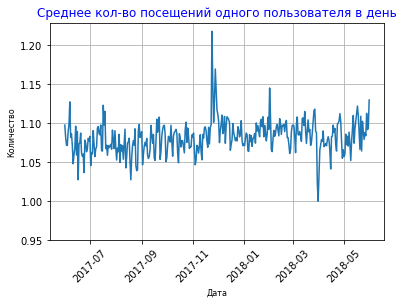

In [18]:
visits_on_day['visits_on_day'].plot(ylim=0.95, rot=45, grid=True)
plt.grid()
plt.title('Среднее кол-во посещений одного пользователя в день', fontsize=12, color='blue')
plt.xlabel('Дата', fontsize=8)
plt.ylabel('Количество', fontsize=8)
plt.grid()
plt.show()

#### Средняя продолжительность сессии

In [19]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds

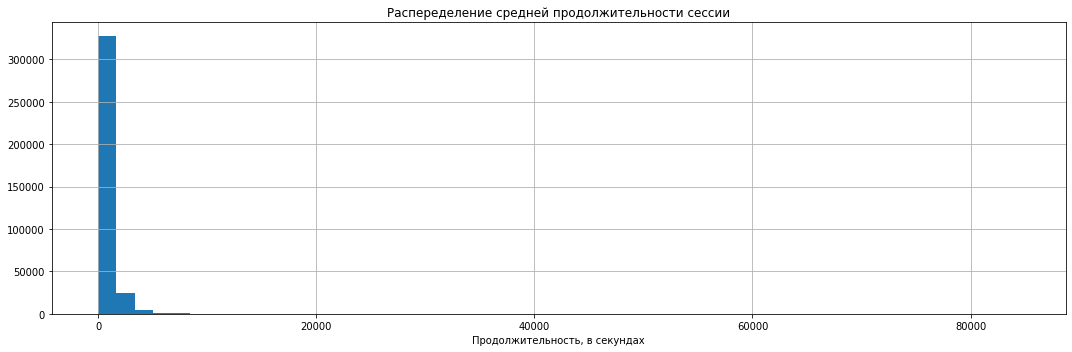

In [20]:
plt.figure(figsize=(15,5))
plt.grid()
visits['duration'].hist(bins=50)
plt.title('Распеределение средней продолжительности сессии')
plt.xlabel('Продолжительность, в секундах')
plt.tight_layout()
plt.show()
    

In [21]:
visits['duration'].mode()

0    60
dtype: int64

#### Retation Rate

In [22]:
first_start_ts = visits.groupby(['uid'])['start_ts'].min()
first_start_ts.name = 'first_start_ts'
visits = visits.join(first_start_ts, on='uid')
visits

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_week,start_date,duration,first_start_ts
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00
...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-01-01,2017-07-01,2017-07-27,2017-07-29,19,2017-07-29 19:07:00
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-01,2018-01-25,2018-01-25,19,2018-01-25 17:38:00
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-01-01,2018-03-01,2018-03-01,2018-03-03,19,2018-03-03 10:12:00
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-01-01,2017-11-01,2017-11-02,2017-11-02,19,2017-11-02 10:12:00


In [23]:
visits['first_start_month'] = visits['first_start_ts'].astype('datetime64[M]')
visits['start_month'] = visits['start_ts'].astype('datetime64[M]')
visits['cohort_lifetime'] = (visits['start_month'] - visits['first_start_month'])
visits['cohort_lifetime'] = (visits['cohort_lifetime'] / np.timedelta64(1, 'M')).round().astype('int') 
visits

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_week,start_date,duration,first_start_ts,first_start_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-01-01,2017-07-01,2017-07-27,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-01,2018-01-25,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-01-01,2018-03-01,2018-03-01,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-01-01,2017-11-01,2017-11-02,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,0


In [24]:
cohorts = visits.groupby(['first_start_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_start_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_start_month') 

cohorts['retention'] = (cohorts['uid']/cohorts['cohort_users'])

In [25]:
cohorts

,first_start_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557
...,...,...,...,...,...
73,2018-03-01,1,861,20589,0.041818
74,2018-03-01,2,557,20589,0.027053
75,2018-04-01,0,15709,15709,1.000000
76,2018-04-01,1,760,15709,0.048380


In [26]:
retention_pivot = cohorts.pivot_table(
    index='first_start_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')

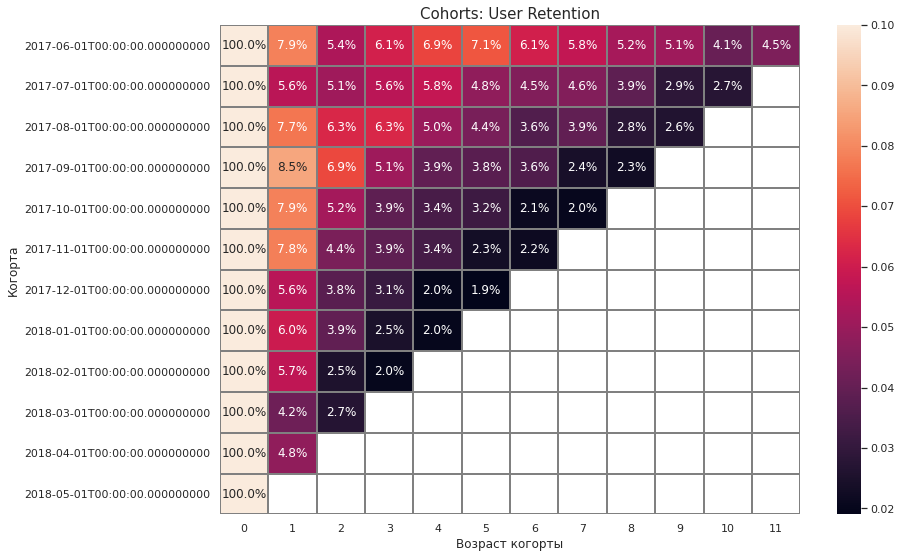

In [27]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention', fontsize=15)
sns.heatmap(retention_pivot, 
            annot=True, 
            fmt='.1%', 
            linewidths=1, 
            linecolor = 'gray', 
            vmax= 0.1)
plt.xlabel('Возраст когорты', fontsize=12)
plt.ylabel('Когорта', fontsize=12)
plt.show()

In [28]:
retention_pivot[2].mean()

0.0463326221636773

### Метрики электронной коммерции

#### Cредняя продолжительность между первых посещением и первой покупкой

In [29]:
first_buy = orders.groupby(['uid'])['buy_ts'].min()
first_buy.name = 'first_buy'
first_buy.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_buy, dtype: datetime64[ns]

In [30]:
visits = visits.join(first_buy, on='uid')
visits_and_orders = visits[~visits['first_buy'].isnull()]
visits_and_orders.head()

,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_week,start_date,duration,first_start_ts,first_start_month,cohort_lifetime,first_buy
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2,2018-03-09 20:25:00
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-09-04 12:46:00
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018-01-01,2018-02-01,2018-02-01,2018-02-06,300,2017-06-04 14:17:00,2017-06-01,8,2017-06-25 08:54:00
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-01-01,2018-02-01,2018-02-08,2018-02-12,3960,2018-02-10 12:17:00,2018-02-01,0,2018-02-12 19:48:00
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017-01-01,2017-12-01,2017-11-30,2017-12-05,420,2017-09-23 23:27:00,2017-09-01,3,2017-09-27 09:23:00


In [31]:
visits_and_orders['time_of_purchase'] = (visits_and_orders['first_buy'] - visits_and_orders['first_start_ts']).dt.seconds
visits_and_orders

/tmp/ipykernel_139/1740350213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visits_and_orders['time_of_purchase'] = (visits_and_orders['first_buy'] - visits_and_orders['first_start_ts']).dt.seconds


,device,end_ts,source_id,start_ts,uid,start_year,start_month,start_week,start_date,duration,first_start_ts,first_start_month,cohort_lifetime,first_buy,time_of_purchase
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2,2018-03-09 20:25:00,1200
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-01-01,2017-09-01,2017-08-31,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,0,2017-09-04 12:46:00,54660
12,desktop,2018-02-06 15:50:00,4,2018-02-06 15:45:00,8056418121947262981,2018-01-01,2018-02-01,2018-02-01,2018-02-06,300,2017-06-04 14:17:00,2017-06-01,8,2017-06-25 08:54:00,67020
15,touch,2018-02-12 20:30:00,2,2018-02-12 19:24:00,18188358787673499603,2018-01-01,2018-02-01,2018-02-08,2018-02-12,3960,2018-02-10 12:17:00,2018-02-01,0,2018-02-12 19:48:00,27060
25,desktop,2017-12-05 10:28:00,4,2017-12-05 10:21:00,2307401184189569202,2017-01-01,2017-12-01,2017-11-30,2017-12-05,420,2017-09-23 23:27:00,2017-09-01,3,2017-09-27 09:23:00,35760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-01-01,2017-07-01,2017-07-27,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,0,2017-07-29 19:07:00,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-01,2018-01-01,2018-01-25,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,0,2018-01-25 17:38:00,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-01-01,2018-03-01,2018-03-01,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,0,2018-03-03 10:12:00,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-01-01,2017-11-01,2017-11-02,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,0,2017-11-02 10:12:00,0


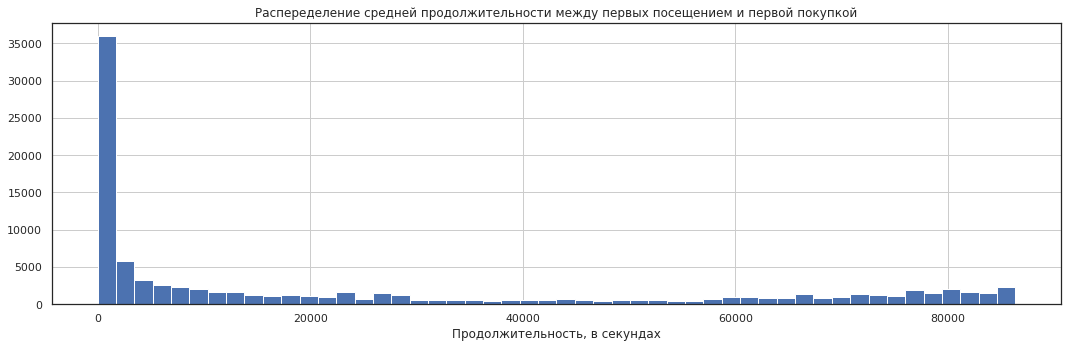

In [32]:
plt.figure(figsize=(15,5))
plt.grid()
visits_and_orders['time_of_purchase'].hist(bins=50)
plt.title('Распеределение средней продолжительности между первых посещением и первой покупкой')
plt.xlabel('Продолжительность, в секундах')
plt.tight_layout()
plt.show()


In [33]:
visits_and_orders['time_of_purchase'].median() / 3600

2.2

#### Cреднее количество покупок на одного покупателя за 6 месяцев

In [34]:
orders = orders.join(first_buy, on='uid')
orders['time_to_buy'] = orders['buy_ts'] - orders['first_buy']
filtered_orders = orders[(orders['time_to_buy'] <= '180 days')]
filtered_orders.head()

,buy_ts,revenue,uid,first_buy,time_to_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,0 days
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,0 days
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,0 days
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,0 days
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,0 days


In [35]:
count_orders_by_users = filtered_orders.groupby(['uid']).agg({'buy_ts':'count'}).reset_index()
count_orders_by_users

,uid,buy_ts
0,313578113262317,1
1,1575281904278712,2
2,2429014661409475,1
3,2464366381792757,1
4,2551852515556206,2
...,...,...
36518,18445147675727495770,1
36519,18445407535914413204,3
36520,18445601152732270159,1
36521,18446156210226471712,1


In [36]:
count_orders_by_users['buy_ts'].median()

1.0

In [37]:
count_orders_by_users['buy_ts'].mean()

1.3311611861019084

#### Cредний чек

In [38]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders['first_buy_month'] = orders['first_buy'].astype('datetime64[M]')

In [39]:
average_check = orders.groupby(['buy_month']).agg({'revenue': ['count', 'sum']})
average_check.columns = ['n_buy', 'sum_buy']
average_check['buy_on_day'] = (average_check['sum_buy'] / average_check['n_buy'])
average_check

,n_buy,sum_buy,buy_on_day
buy_month,,,
2017-06-01,2354,9557.49,4.060106
2017-07-01,2363,12539.47,5.306589
2017-08-01,1807,8758.78,4.847139
2017-09-01,3387,18345.51,5.416448
2017-10-01,5679,27987.70,4.928280
2017-11-01,5659,27069.93,4.783518
2017-12-01,6218,36388.60,5.852139
2018-01-01,4721,19417.13,4.112927
2018-02-01,5281,25560.54,4.840095


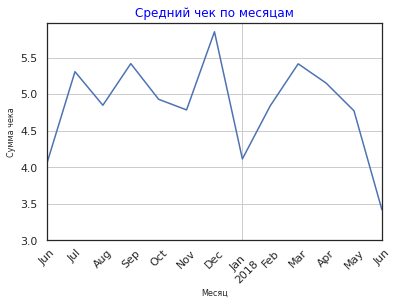

In [40]:
plt.grid()
average_check['buy_on_day'].plot(ylim=3, rot=45, grid=True)
plt.title('Средний чек по месяцам', fontsize=12, color='blue')
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Сумма чека', fontsize=8)
plt.show()

#### LTV

In [41]:
cohort_sizes = orders.groupby(['first_buy_month']).agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'n_buyers']

In [42]:
cohorts_buy = orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts_buy, on='first_buy_month')
report

,first_buy_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58
...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87
75,2018-04-01,2276,2018-04-01,10600.69
76,2018-04-01,2276,2018-05-01,1209.92
77,2018-05-01,2988,2018-05-01,13925.76


In [43]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['buy_month'] - report['first_buy_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [44]:
report['ltv'] = report['gp'] / report['n_buyers']
report

,first_buy_month,n_buyers,buy_month,revenue,gp,age,ltv
0,2017-06-01,2023,2017-06-01,9557.49,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,2068.58,4,1.022531
...,...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,13925.76,0,4.660562


In [45]:
report['revenue'].sum()

252057.19999999934

In [46]:
orders['revenue'].sum() #проверка

252057.19999999998

In [47]:
output = report.pivot_table(index='first_buy_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1)
output.round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.45,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.5,7.66,7.78,7.92,8.08,8.23,8.39,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.38,7.59,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.44,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.08,6.23,6.28,6.4,,,,,
2017-12-01,4.74,5.0,5.92,6.99,7.3,7.64,,,,,,
2018-01-01,4.14,4.43,4.73,4.88,4.94,,,,,,,
2018-02-01,4.16,4.44,4.51,4.59,,,,,,,,


In [48]:
output.cumsum(axis=1).mean(axis=0)[5]

40.02846357900007

In [49]:
output.mean(axis=0)[5]

7.969052630207335

In [50]:
report.groupby('buy_month')['ltv'].mean()

buy_month
2017-06-01    4.724414
2017-07-01    3.247774
2017-08-01    2.016455
2017-09-01    1.923681
2017-10-01    1.592261
2017-11-01    1.252491
2017-12-01    1.557878
2018-01-01    0.767326
2018-02-01    0.822902
2018-03-01    0.862864
2018-04-01    0.625925
2018-05-01    0.583127
2018-06-01    3.420000
Name: ltv, dtype: float64

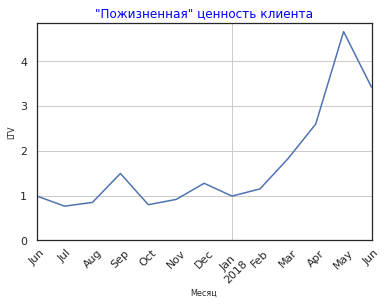

In [51]:
plt.grid()
report.groupby('first_buy_month')['ltv'].mean().plot(ylim=0, rot=45, grid=True)
plt.title('"Пожизненная" ценность клиента', fontsize=12, color='blue')
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('LTV', fontsize=8)
plt.show()

 ### Маркетинговые метрики

#### Сумма расходов на маркетинг

In [52]:
costs_sid = costs.groupby('source_id')['costs'].sum()
round(costs_sid.sum(), 2)

329131.62

In [53]:
costs['dt_month'] = costs['dt'].astype('datetime64[M]')

In [54]:
costs_source_id = costs.groupby('source_id')['costs'].sum().reset_index()

In [55]:
costs_source_id

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [56]:
costs.pivot_table(index='dt_month', 
                   columns='source_id', 
                   values='costs', 
                   aggfunc='sum')

source_id,1,2,3,4,5,9,10
dt_month,,,,,,,
2017-06-01,1125.61,2427.38,7731.65,3514.80,2616.12,285.22,314.22
2017-07-01,1072.88,2333.11,7674.37,3529.73,2998.14,302.54,329.82
2017-08-01,951.81,1811.05,6143.54,3217.36,2185.28,248.93,232.57
2017-09-01,1502.01,2985.66,9963.55,5192.26,3849.14,415.62,460.67
2017-10-01,2315.75,4845.00,15737.24,6420.84,5767.40,609.41,627.24
2017-11-01,2445.16,5247.68,17025.34,5388.82,6325.34,683.18,792.36
2017-12-01,2341.20,4897.80,16219.52,7680.47,5872.52,657.98,645.86
2018-01-01,2186.18,4157.74,14808.78,5832.79,5371.52,547.16,614.35
2018-02-01,2204.48,4474.34,14228.56,5711.96,5071.31,551.50,480.88


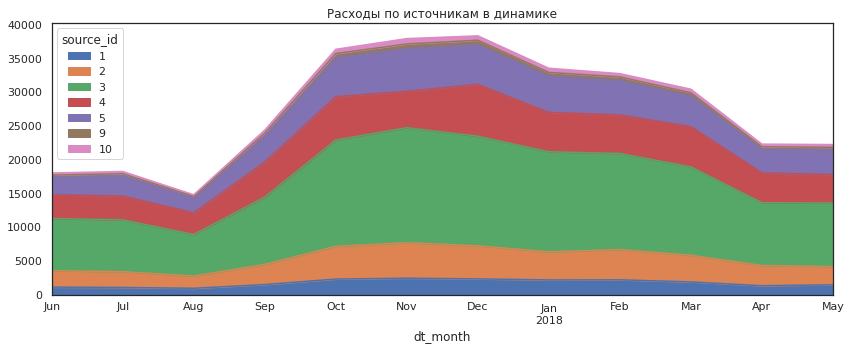

In [57]:
costs.pivot_table(index='dt_month', 
                   columns='source_id', 
                   values='costs', 
                   aggfunc='sum').plot.area(figsize=(14,5), title='Расходы по источникам в динамике')
plt.show()

In [58]:
costs.groupby('dt_month')['costs'].sum()

dt_month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
2017-11-01    37907.88
2017-12-01    38315.35
2018-01-01    33518.52
2018-02-01    32723.03
2018-03-01    30415.27
2018-04-01    22289.38
2018-05-01    22224.27
Name: costs, dtype: float64

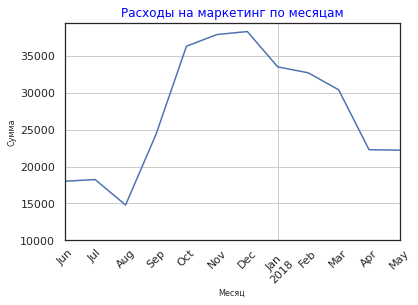

In [59]:
plt.grid()
costs.groupby('dt_month')['costs'].sum().plot(ylim=10000, rot=45, grid=True)
plt.title('Расходы на маркетинг по месяцам', fontsize=12, color='blue')
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('Сумма', fontsize=8)
plt.show()

#### CAC

In [60]:
cohort_costs = (
    costs.groupby(['dt_month'])
    .agg({'costs': ['count', 'sum']})
    .reset_index()
)
cohort_costs.columns = ['month_costs', 'n_costs', 'sum_costs']
cohort_costs = cohort_costs.merge(cohort_sizes, left_on='month_costs', right_on='first_buy_month')
cohort_costs ['cac'] = cohort_costs['sum_costs'] / cohort_costs['n_buyers']
cohort_costs

,month_costs,n_costs,sum_costs,first_buy_month,n_buyers,cac
0,2017-06-01,210,18015.00,2017-06-01,2023,8.905091
1,2017-07-01,217,18240.59,2017-07-01,1923,9.485486
2,2017-08-01,217,14790.54,2017-08-01,1370,10.796015
3,2017-09-01,210,24368.91,2017-09-01,2581,9.441654
4,2017-10-01,217,36322.88,2017-10-01,4340,8.369327
5,2017-11-01,210,37907.88,2017-11-01,4081,9.288870
6,2017-12-01,217,38315.35,2017-12-01,4383,8.741809
7,2018-01-01,217,33518.52,2018-01-01,3373,9.937302
8,2018-02-01,196,32723.03,2018-02-01,3651,8.962758
9,2018-03-01,211,30415.27,2018-03-01,3533,8.608907


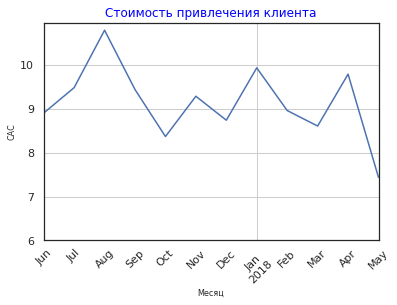

In [61]:
plt.grid()
cohort_costs.groupby('month_costs')['cac'].mean().plot(ylim=6, rot=45, grid=True)
plt.title('Стоимость привлечения клиента', fontsize=12, color='blue')
plt.xlabel('Месяц', fontsize=8)
plt.ylabel('САС', fontsize=8)
plt.show()

In [62]:
round(cohort_costs['cac'].mean(), 2)

9.15

In [63]:
cohort_source = visits.groupby(['source_id']).agg({'uid': 'nunique'}).reset_index()
cohort_source.columns = ['source_id', 'n_uid']
cohort_source

,source_id,n_uid
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


In [64]:
cohort_source = cohort_source.merge(costs_source_id, on='source_id')
cohort_source['cac_source'] = cohort_source['costs']  / cohort_source['n_uid'] 
cohort_source

,source_id,n_uid,costs,cac_source
0,1,18999,20833.27,1.096546
1,2,26245,42806.04,1.631017
2,3,74756,141321.63,1.890439
3,4,83525,61073.60,0.731201
4,5,56974,51757.10,0.908434
5,9,9264,5517.49,0.595584
6,10,8067,5822.49,0.721766


In [65]:
round(cohort_source['cac_source'].mean(), 2)

1.08

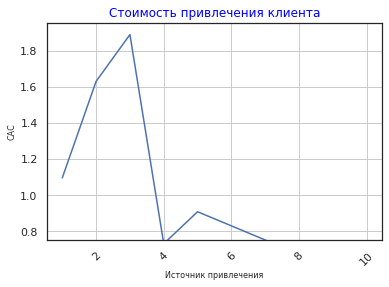

In [66]:
plt.grid()
cohort_source.groupby('source_id')['cac_source'].mean().plot(ylim=0.75, rot=45, grid=True)
plt.title('Стоимость привлечения клиента', fontsize=12, color='blue')
plt.xlabel('Источник привлечения', fontsize=8)
plt.ylabel('САС', fontsize=8)
plt.show()

#### ROMI

In [67]:
first_start_ts = visits_new.groupby(['uid'])['start_ts'].min().reset_index()
first_start_ts.columns = ['uid','first_start_ts']
first_start_ts

,uid,first_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00
...,...,...
228164,18446403737806311543,2017-11-30 03:36:00
228165,18446424184725333426,2017-12-06 20:32:00
228166,18446556406699109058,2018-01-01 16:29:00
228167,18446621818809592527,2017-12-27 13:27:00


In [68]:
visits_new = first_start_ts.merge(visits_new, on='uid')
visits_new

,uid,first_start_ts,device,end_ts,source_id,start_ts
0,11863502262781,2018-03-01 17:27:00,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00
4,313578113262317,2017-09-18 22:49:00,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00
...,...,...,...,...,...,...
359395,18446424184725333426,2017-12-06 20:32:00,touch,2017-12-06 20:32:00,4,2017-12-06 20:32:00
359396,18446556406699109058,2018-01-01 16:29:00,touch,2018-01-01 16:31:00,3,2018-01-01 16:29:00
359397,18446621818809592527,2017-12-27 13:27:00,desktop,2018-05-21 09:45:00,4,2018-05-21 09:30:00
359398,18446621818809592527,2017-12-27 13:27:00,desktop,2017-12-27 14:08:00,4,2017-12-27 13:27:00


In [69]:
users = visits_new.sort_values('first_start_ts').groupby('uid').first()
users = users[['source_id']]
users

,source_id
uid,
11863502262781,3
49537067089222,2
297729379853735,3
313578113262317,2
325320750514679,5
...,...
18446403737806311543,5
18446424184725333426,4
18446556406699109058,3


In [70]:
orders_new = orders_new.merge(users, on='uid')
orders_new

,buy_ts,revenue,uid,source_id
0,2017-06-01 00:10:00,17.00,10329302124590727494,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,3
...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3
50413,2018-05-31 23:56:00,3.67,3993697860786194247,4


In [71]:
first_buy_new = orders_new.groupby(['uid'])['buy_ts'].min()
first_buy_new.name = 'first_buy'
first_buy_new.head()

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_buy, dtype: datetime64[ns]

In [72]:
orders_new = orders_new.join(first_buy_new, on='uid')
orders_new

,buy_ts,revenue,uid,source_id,first_buy
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:10:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:25:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:27:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:29:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:58:00
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,2018-05-31 23:50:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,2018-05-31 23:50:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,2018-05-31 23:54:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,4,2018-05-31 23:56:00


In [73]:
orders_new['buy_month'] = orders_new['buy_ts'].astype('datetime64[M]')
orders_new['first_buy_month'] = orders_new['first_buy'].astype('datetime64[M]')
costs_new['dt_month'] = costs_new['dt'].astype('datetime64[M]')
orders_new

,buy_ts,revenue,uid,source_id,first_buy,buy_month,first_buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,1,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,3,2017-06-01 07:58:00,2017-06-01,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,4,2018-05-31 23:50:00,2018-05-01,2018-05-01
50411,2018-05-31 23:50:00,5.80,11369640365507475976,10,2018-05-31 23:50:00,2018-05-01,2018-05-01
50412,2018-05-31 23:54:00,0.30,1786462140797698849,3,2018-05-31 23:54:00,2018-05-01,2018-05-01
50413,2018-05-31 23:56:00,3.67,3993697860786194247,4,2018-05-31 23:56:00,2018-05-01,2018-05-01


In [74]:
orders_new['source_id'].unique()

array([ 1,  2,  3,  5,  4,  9, 10,  7])

In [75]:
def calculation_romi(df_orders, df_costs):
    cohort_sizes_romi = df_orders.groupby(['first_buy_month']).agg({'uid': 'nunique'}).reset_index()
    cohort_sizes_romi.columns = ['first_buy_month', 'n_buyers']
    cohorts_buy_romi = df_orders.groupby(['first_buy_month', 'buy_month']).agg({'revenue': 'sum'}).reset_index()
    report_romi = pd.merge(cohort_sizes_romi, cohorts_buy_romi, on='first_buy_month')
    margin_rate = 1
    report_romi['gp'] = report_romi['revenue'] * margin_rate
    report_romi['age'] = (report_romi['buy_month'] - report_romi['first_buy_month']) / np.timedelta64(1, 'M')
    report_romi['age'] = report_romi['age'].round().astype('int')
    report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']
    monthly_costs_romi = df_costs.groupby('dt_month')['costs'].sum()
    report_new_romi = pd.merge(report_romi, monthly_costs_romi, left_on='first_buy_month', right_on='dt_month')
    report_new_romi['cac'] = report_new_romi['costs'] / report_new_romi['n_buyers']
    report_new_romi['romi'] = report_new_romi['ltv'] / report_new_romi['cac']
    plt.figure(figsize=(13, 9))
    sns.heatmap(report_romi.pivot_table(index='first_buy_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1),
            annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='LTV', yticklabels = report_romi.pivot_table(index='first_buy_month', columns='age', values='ltv', aggfunc='mean').cumsum(axis=1).index.astype('str'))
    plt.show()
    plt.figure(figsize=(13, 9))
    sns.heatmap(report_new_romi.pivot_table(index='first_buy_month', values='cac', aggfunc='mean'),
            annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='CAC', yticklabels = report_new_romi.pivot_table(index='first_buy_month', values='cac', aggfunc='mean').index.astype('str'))
    plt.show()    
    plt.figure(figsize=(13, 9))
    sns.heatmap(report_new_romi.pivot_table(index='first_buy_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1),
            annot=True, fmt='.2f', linewidths=1, linecolor='grey', cbar_kws= {'orientation': 'horizontal'} 
            ).set(title ='ROMI', yticklabels = report_new_romi.pivot_table(index='first_buy_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1).index.astype('str'))
    plt.show()

Источник № 1


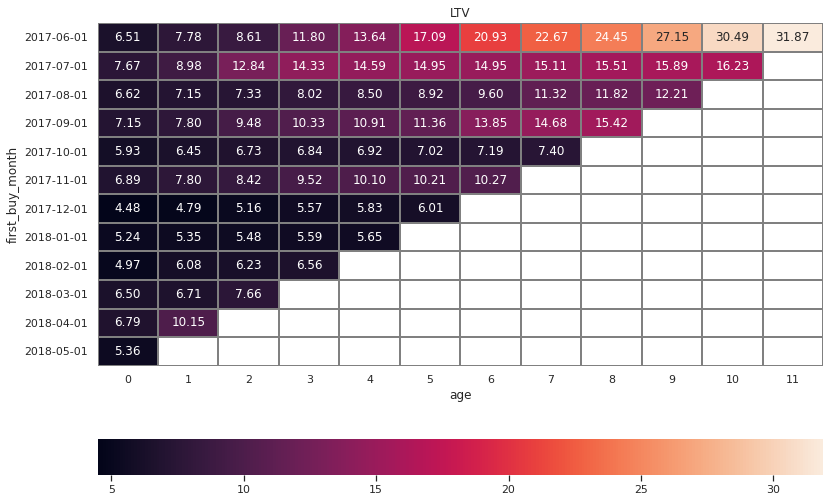

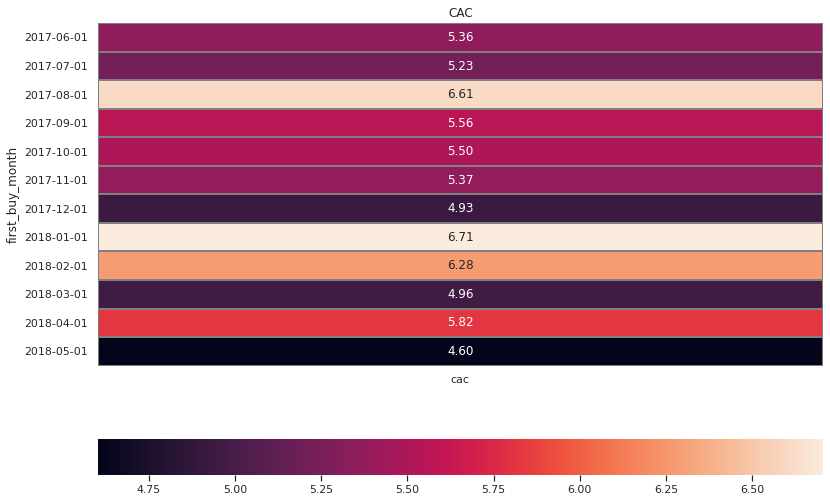

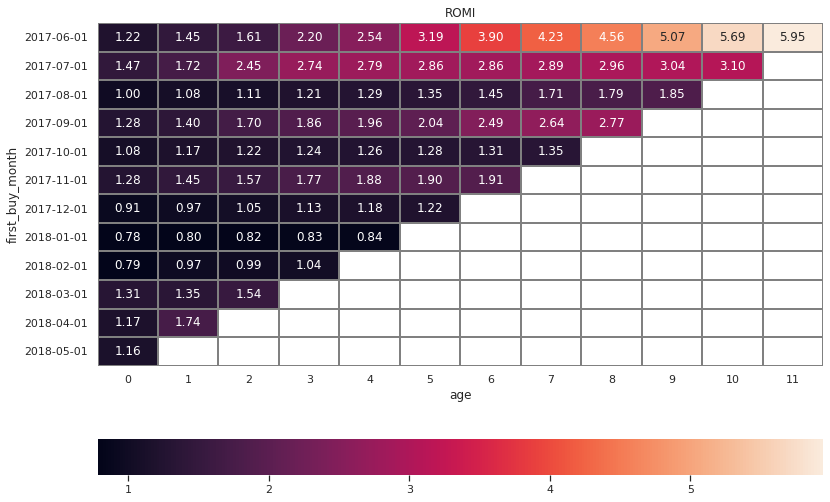

In [76]:
print('Источник № 1')
calculation_romi(orders_new[orders_new['source_id'] == 1], costs_new[costs_new['source_id'] == 1])

Источник № 2


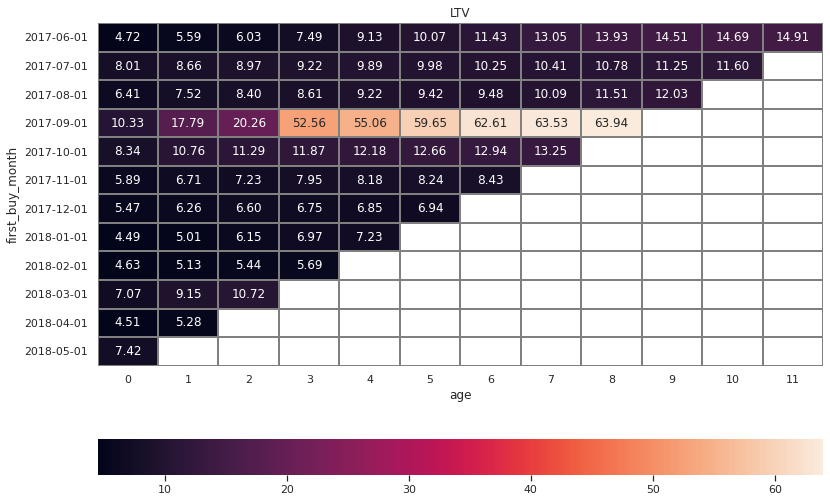

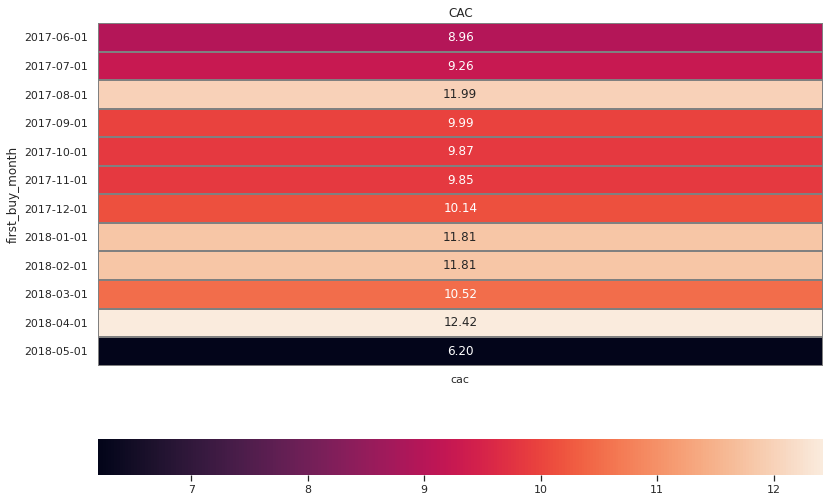

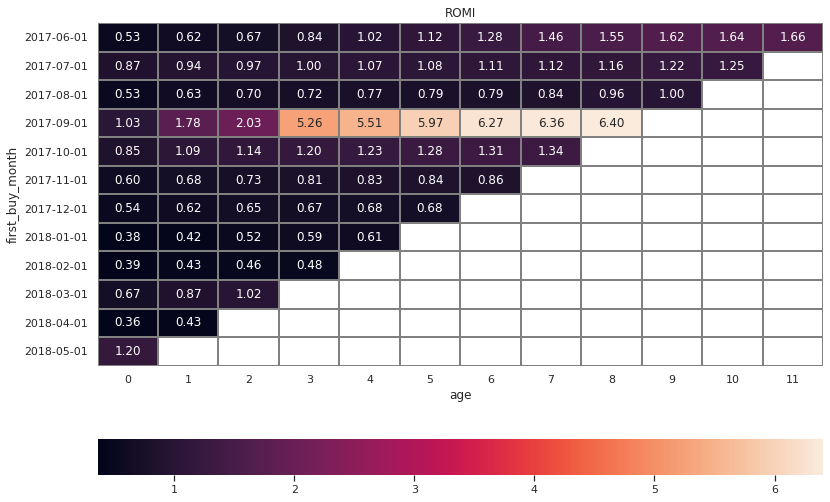

In [77]:
print('Источник № 2')
calculation_romi(orders_new[orders_new['source_id'] == 2], costs_new[costs_new['source_id'] == 2])

Источник № 3


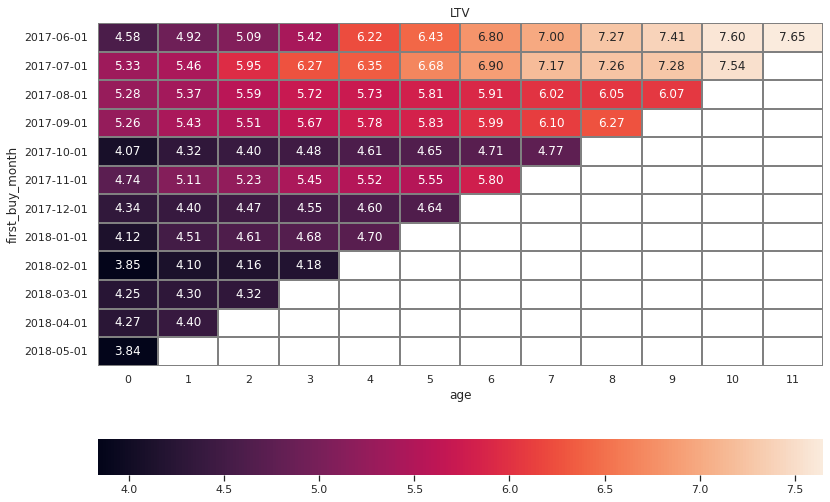

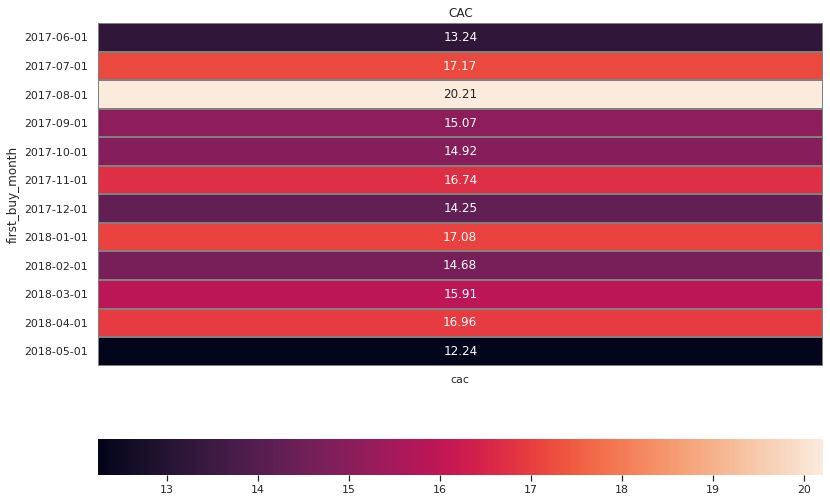

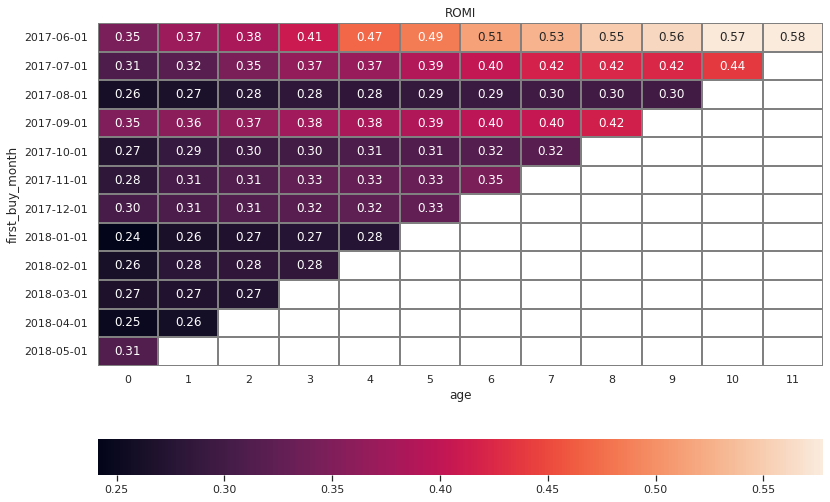

In [78]:
print('Источник № 3')
calculation_romi(orders_new[orders_new['source_id'] == 3], costs_new[costs_new['source_id'] == 3])

Источник № 4


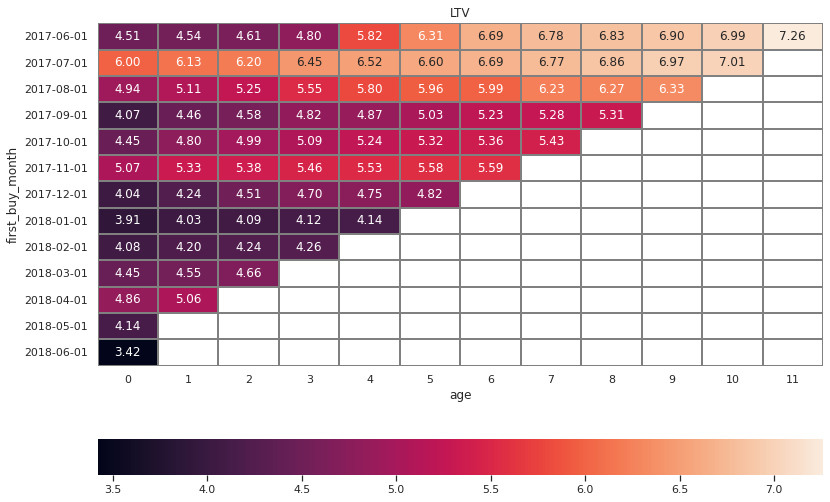

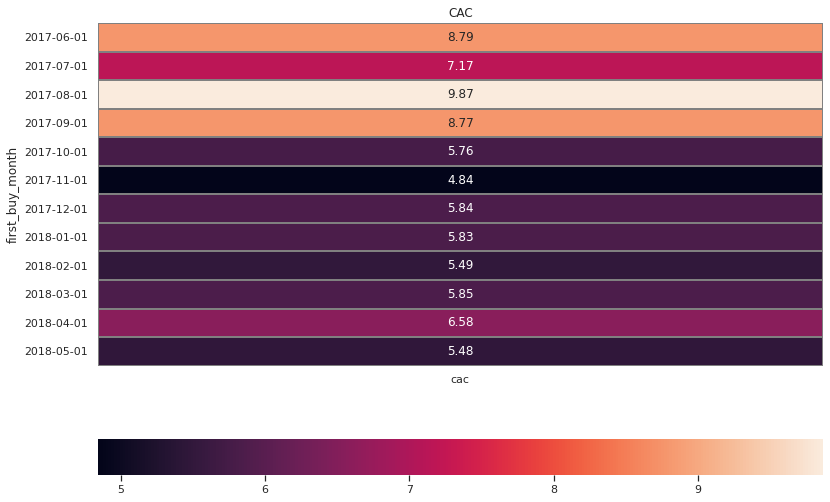

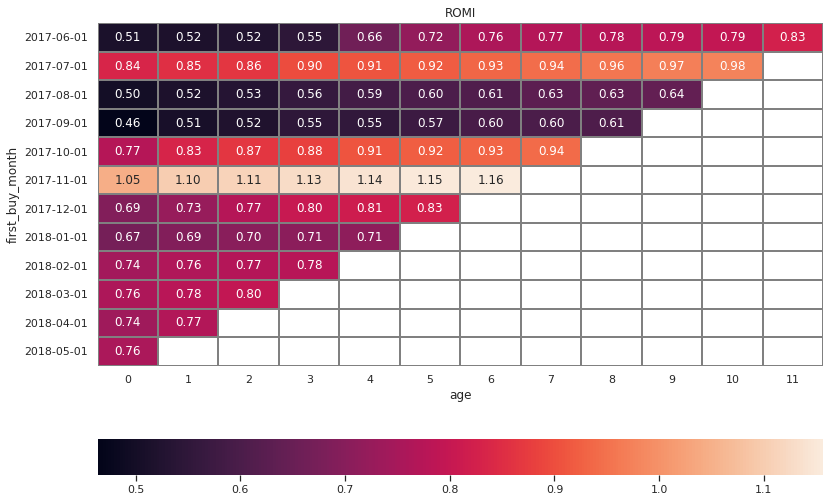

In [79]:
print('Источник № 4')
calculation_romi(orders_new[orders_new['source_id'] == 4], costs_new[costs_new['source_id'] == 4])

Источник № 5


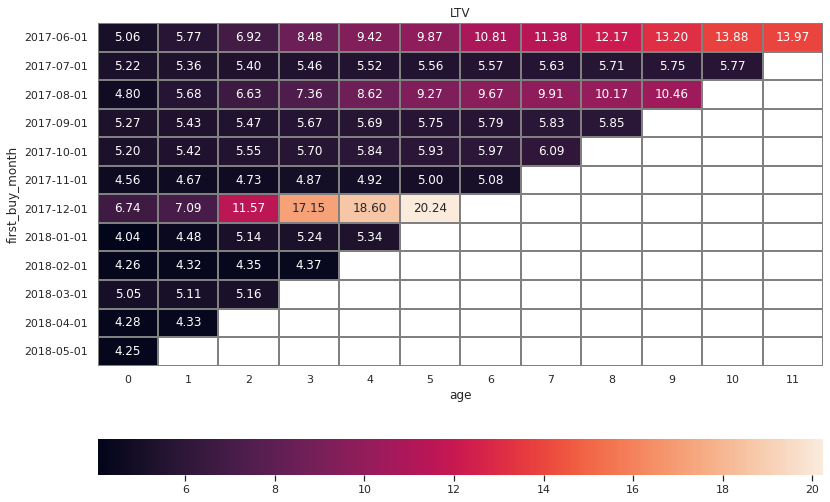

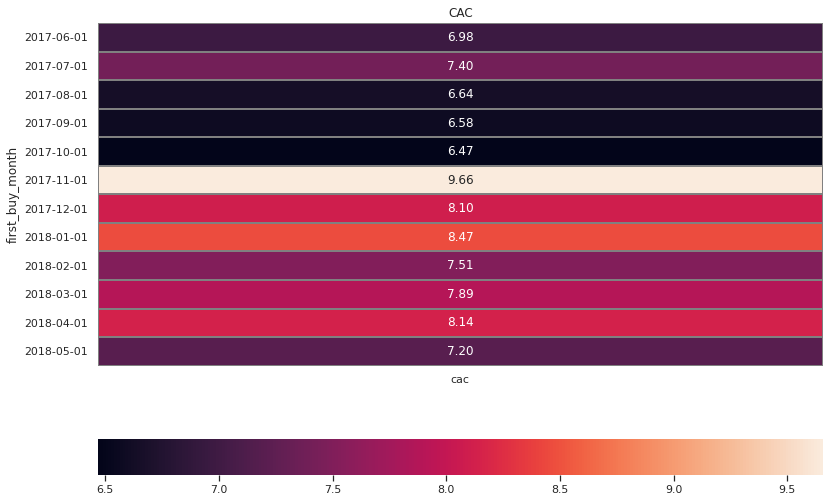

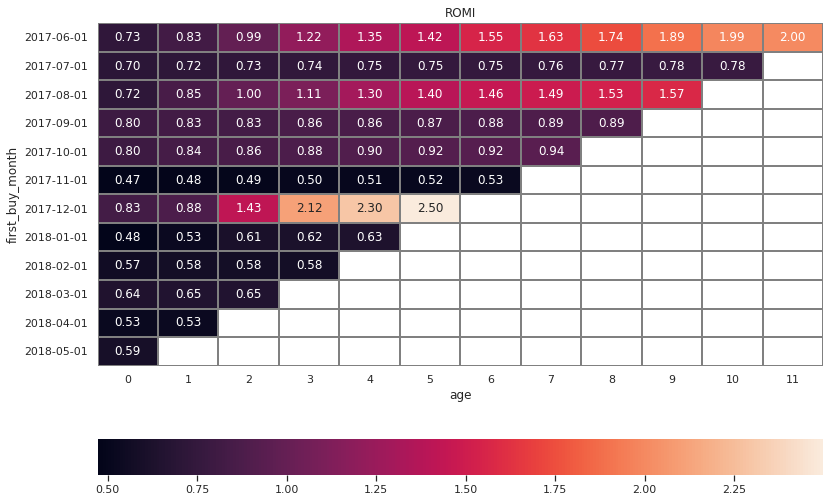

In [80]:
print('Источник № 5')
calculation_romi(orders_new[orders_new['source_id'] == 5], costs_new[costs_new['source_id'] == 5])

Источник № 9


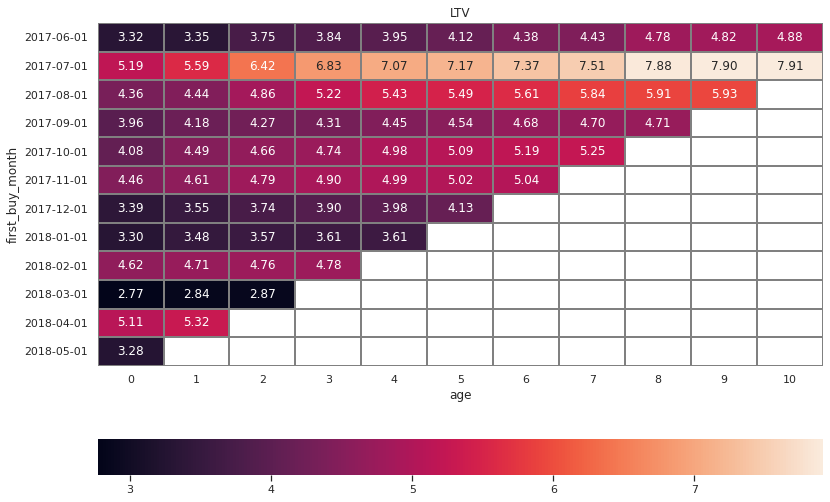

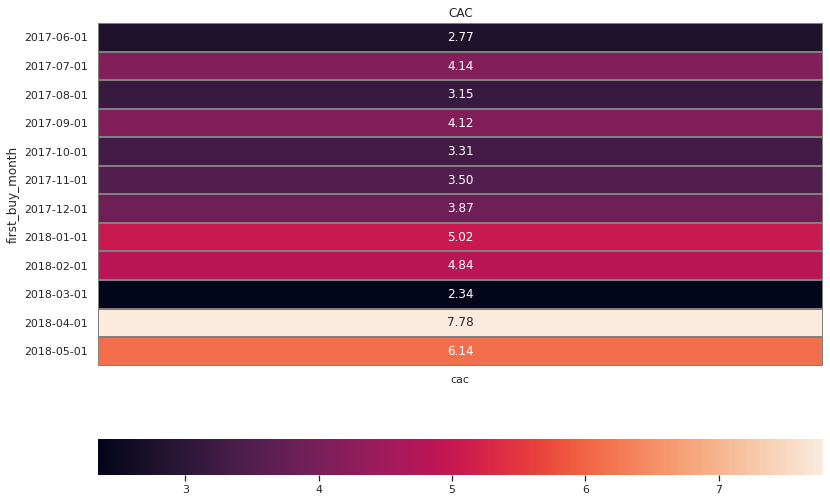

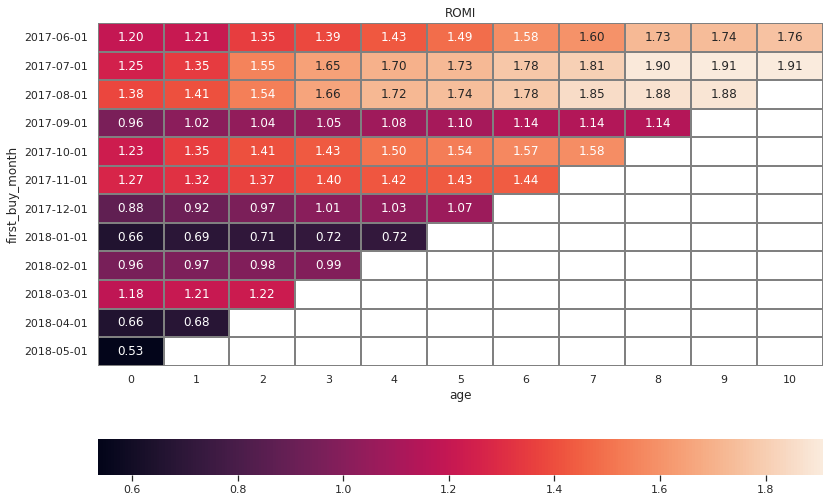

In [81]:
print('Источник № 9')
calculation_romi(orders_new[orders_new['source_id'] == 9], costs_new[costs_new['source_id'] == 9])

Источник № 10


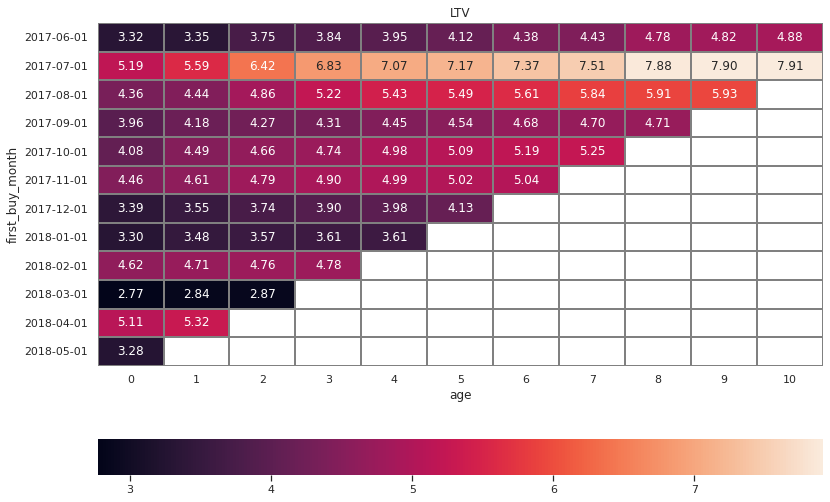

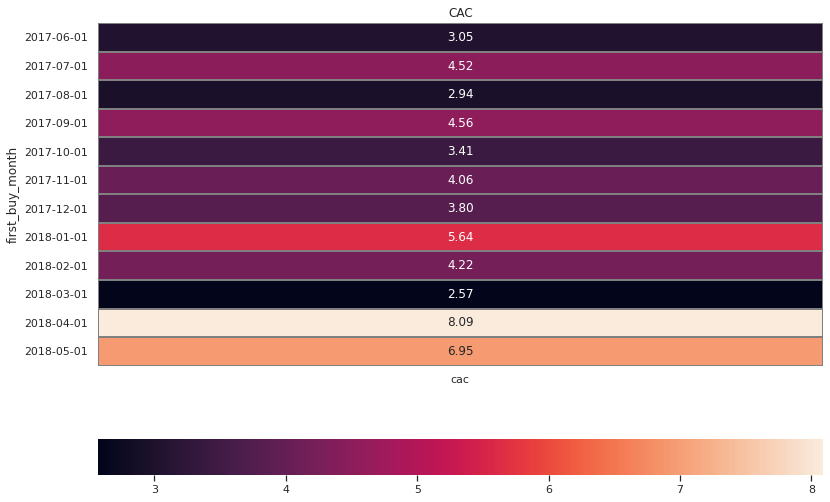

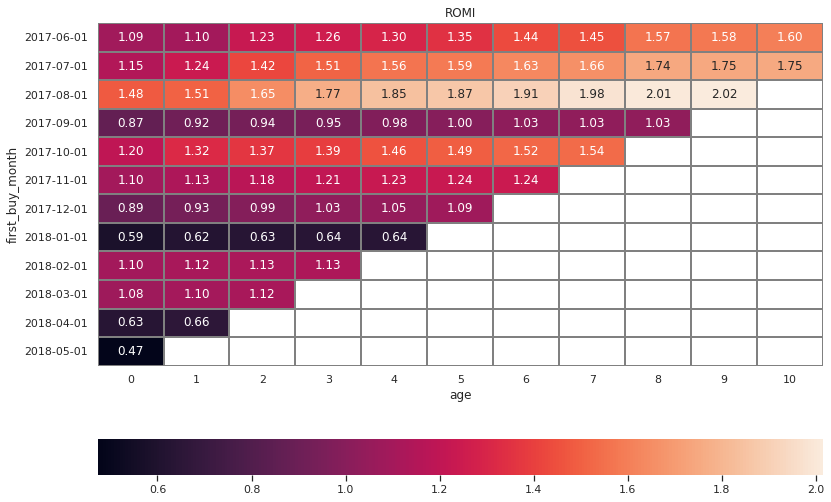

In [82]:
print('Источник № 10')
calculation_romi(orders_new[orders_new['source_id'] == 9], costs_new[costs_new['source_id'] == 10])